In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
# Add the project root directory to Python path
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))

In [2]:
from src.data_preprocessing import FinancialDataPreprocessor
from src.data_preprocessing import FinancialDataLoader

In [3]:
# Load data
loader = FinancialDataLoader()
loader.load_data_from_csv('../data/raw')  # <-- Fixed path

✓ Loaded: BND_DATA (2535 records)
✓ Loaded: SPY_DATA (2535 records)
✓ Loaded: TSLA_DATA (2535 records)


In [4]:
# Preprocess
preprocessor = FinancialDataPreprocessor(loader)
preprocessor.clean_data()


Cleaning financial data...
Cleaning BND_DATA...
✓ BND_DATA cleaned: 2535 records
Cleaning SPY_DATA...
✓ SPY_DATA cleaned: 2535 records
Cleaning TSLA_DATA...
✓ TSLA_DATA cleaned: 2535 records


{'BND_DATA':                                 Open       High        Low      Close  \
 Date                                                                    
 2015-07-01 00:00:00-04:00  60.794213  60.914491  60.764142  60.816765   
 2015-07-02 00:00:00-04:00  60.937005  61.027217  60.937005  60.967075   
 2015-07-06 00:00:00-04:00  61.222679  61.222679  61.057293  61.177570   
 2015-07-07 00:00:00-04:00  61.410611  61.470746  61.237705  61.237705   
 2015-07-08 00:00:00-04:00  61.373001  61.463214  61.312860  61.410591   
 ...                              ...        ...        ...        ...   
 2025-07-24 00:00:00-04:00  72.599185  72.798528  72.579254  72.698860   
 2025-07-25 00:00:00-04:00  72.708822  72.878265  72.688891  72.878265   
 2025-07-28 00:00:00-04:00  72.778590  72.808497  72.718791  72.758659   
 2025-07-29 00:00:00-04:00  72.838394  73.147367  72.838394  73.137398   
 2025-07-30 00:00:00-04:00  72.948036  73.107503  72.888229  72.948036   
 
                        

In [5]:
# Summary stats
print("\nSummary Statistics:")
print(preprocessor.create_summary_statistics().round(2))
# Returns + Stationarity
returns_df = preprocessor.calculate_returns()
print("\nStationarity Tests:")
for symbol in returns_df.columns:
    preprocessor.perform_stationarity_test(returns_df[symbol], symbol)
# Risk metrics
print("\nRisk Metrics:")
print(preprocessor.calculate_risk_metrics().round(4))



Summary Statistics:
Generating summary statistics...
            Count    Mean     Std     Min     25%     50%     75%     Max  \
BND_DATA   2535.0   68.47    4.55   60.78   64.65   67.60   71.89   77.32   
SPY_DATA   2535.0  334.19  126.43  155.87  230.08  305.26  420.35  637.10   
TSLA_DATA  2535.0  131.96  120.91    9.58   18.97   94.57  236.76  479.86   

           Skewness  Kurtosis  
BND_DATA       0.36     -1.09  
SPY_DATA       0.53     -0.76  
TSLA_DATA      0.48     -1.16  
Calculating daily returns...
✓ BND_DATA returns calculated
✓ SPY_DATA returns calculated
✓ TSLA_DATA returns calculated

Stationarity Tests:

ADF Test for BND_DATA:
  ADF Statistic: -9.8898
  p-value: 0.0000
    1% critical value: -3.4330
    5% critical value: -2.8627
    10% critical value: -2.5674
  ✓ BND_DATA is stationary

ADF Test for SPY_DATA:
  ADF Statistic: -16.2644
  p-value: 0.0000
    1% critical value: -3.4329
    5% critical value: -2.8627
    10% critical value: -2.5674
  ✓ SPY_DATA is st


Generating plots...


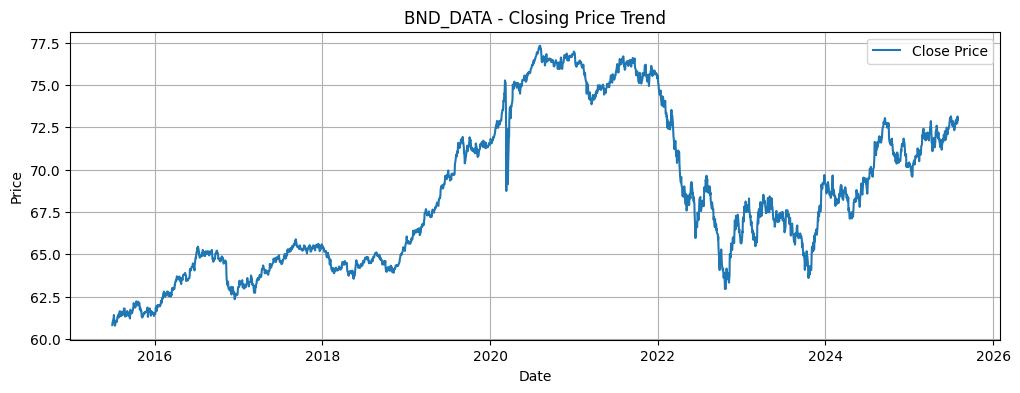

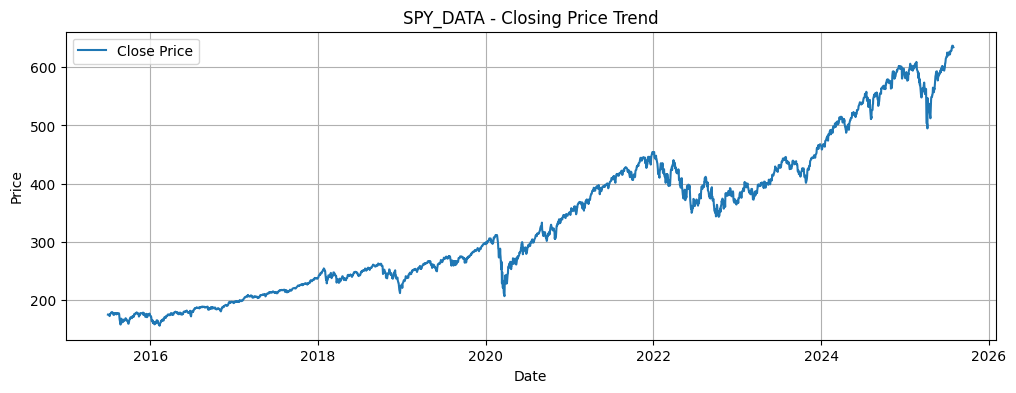

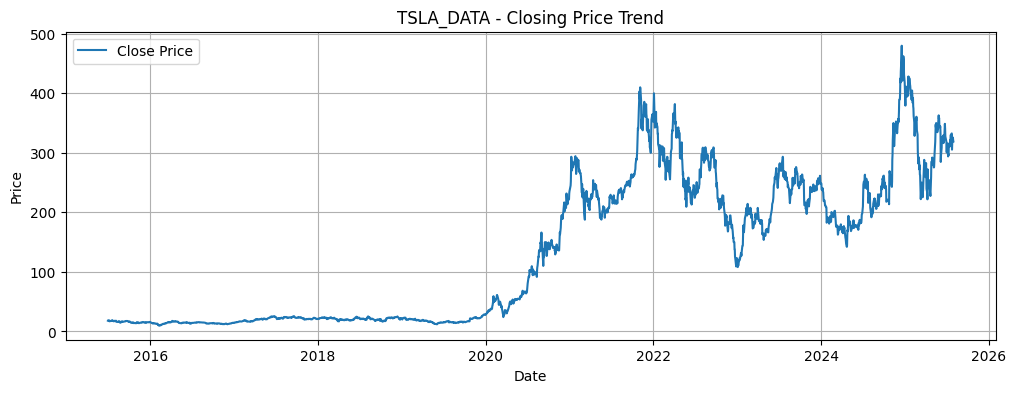

Calculating daily returns...
✓ BND_DATA returns calculated
✓ SPY_DATA returns calculated
✓ TSLA_DATA returns calculated


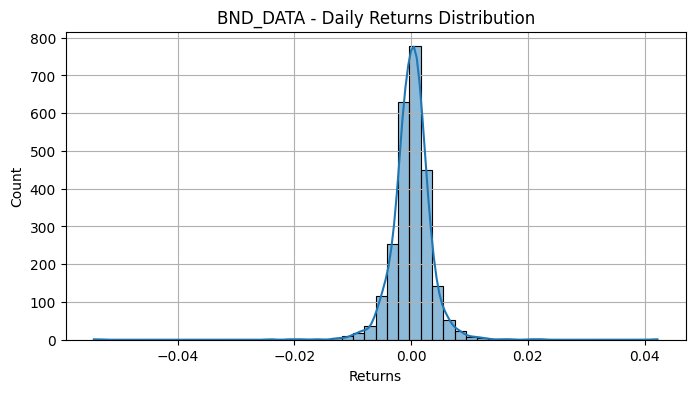

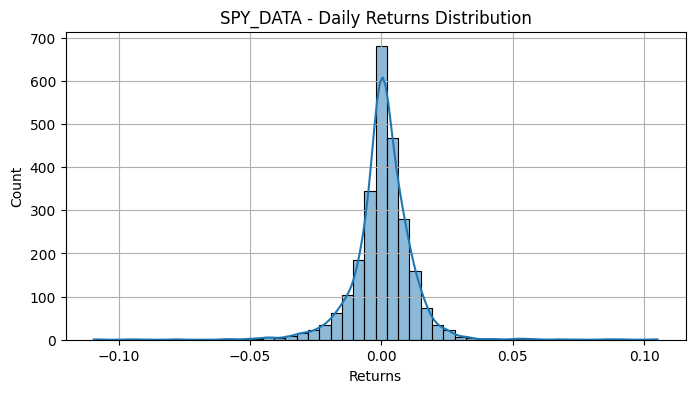

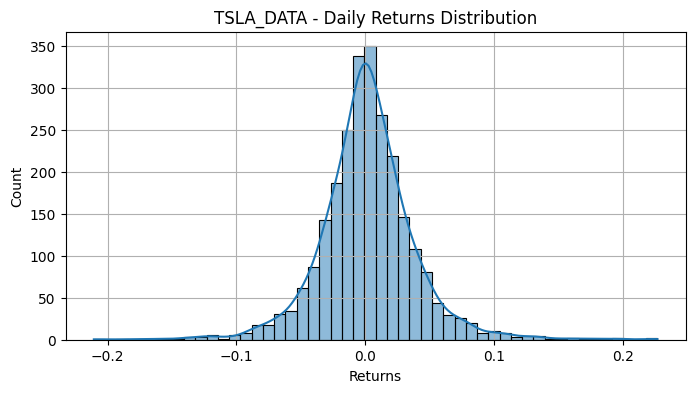

Calculating 30-day rolling volatility...
Calculating daily returns...
✓ BND_DATA returns calculated
✓ SPY_DATA returns calculated
✓ TSLA_DATA returns calculated


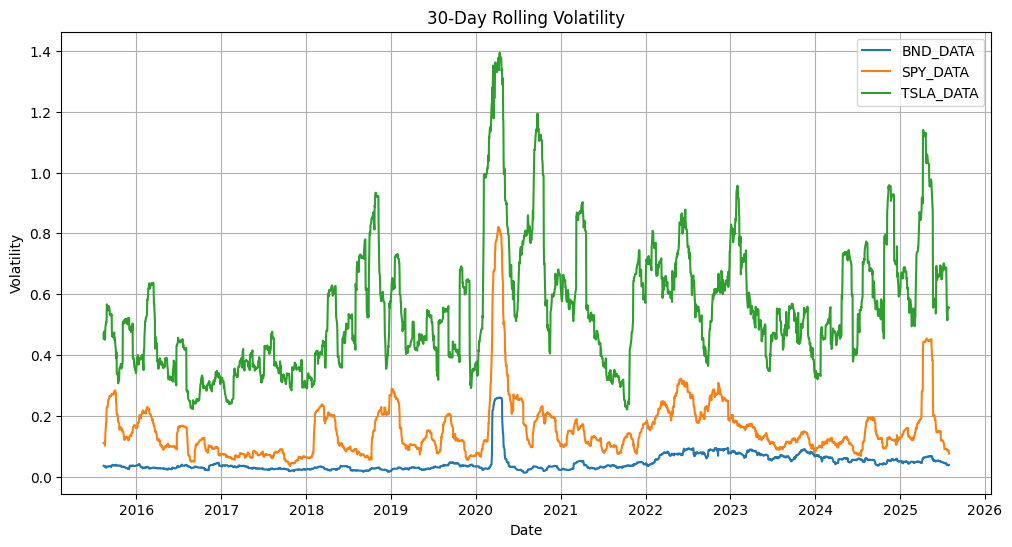

In [6]:
# EDA Plots
print("\nGenerating plots...")
preprocessor.plot_price_trends()
preprocessor.plot_returns_distribution()
preprocessor.plot_volatility_trends()

Calculating daily returns...
✓ BND_DATA returns calculated
✓ SPY_DATA returns calculated
✓ TSLA_DATA returns calculated


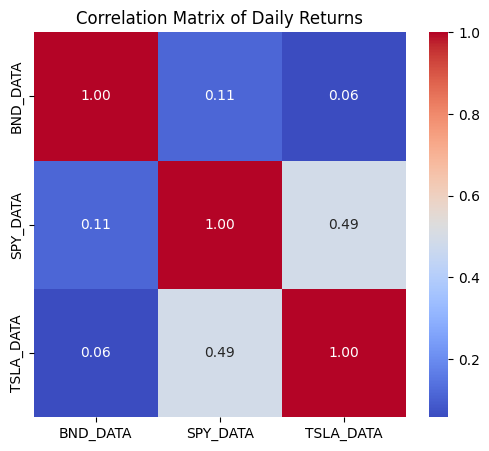

In [7]:
preprocessor.plot_correlation_matrix()

In [8]:
 # Save cleaned data to ../data/cleaned
preprocessor.save_clean_data()

Saving cleaned data to `../data/cleaned`...
✓ Saved: ../data/cleaned\BND_DATA_cleaned.csv
✓ Saved: ../data/cleaned\SPY_DATA_cleaned.csv
✓ Saved: ../data/cleaned\TSLA_DATA_cleaned.csv
